In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

In [ ]:
# Brownian Bridge Code

## SDE:  dX = (b-X) / (T-t) * dt + sigma*dW

## Parameters 
npaths = 2000
T = 1
nsteps = 200
dt = T/nsteps
t = np.arange(0,T,dt)
sigma = 0.9
a = 0.8
b = 1

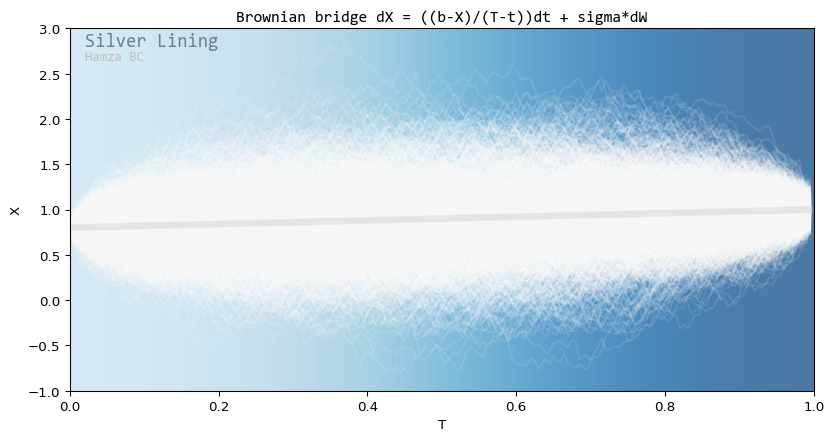

In [3]:
# Monte Carlo

plt.rcParams['savefig.facecolor']='w' ## ensures backgroubd colors are not overwritten in the save
random.seed(10) ## making sure the axis limits remain the same when performing the MC

## Allocating and initialsing all paths for the MC
X = np.zeros((nsteps)*npaths).reshape(nsteps,npaths)
X[0,:] = a
X[-1,:] = b

## Expected path / Silver Lining 
Ex = a +(b-a)/T*t

## Calculatiing the Brownian Bridge with Euler-Maruyama.
for i in range(0,nsteps-1):
    X[i+1,:] = X[i,:] + (b-X[i,:]) / (nsteps-i+1) + sigma*np.sqrt(dt)*np.random.randn(1,npaths);

## PLotting paths, dont need to do the full 20k, unless you want to...

## setting the range for the background color and fonts
grad = [[0, 1], [0, 1]]
xl = 0
xh = 1
yl = -1
yh = 3

csfont = {'fontname':'Lucida Console'}
hfont = {'fontname':'Consolas'}

## Set the size of the plot. I wanted this to generate LinkedIn banners
plt.figure(figsize=(10,5),dpi=96)

## Setting the background color fading from lightblue, instead of white, to darker blues. 
plt.axes().set_facecolor("lightblue")
plt.imshow(grad,  cmap = cm.Blues, interpolation = "bicubic", extent = [xl, xh, yl, yh],alpha = .6, aspect = "auto")


## Plotting all the paths
for i in range(0,2000):
    plt.plot(t,X[:,i],'w',alpha=0.1)
plt.plot(t, Ex,'silver',alpha=0.3,linewidth=5) 
plt.xlabel('T')
plt.ylabel('X')
plt.title('Brownian bridge dX = ((b-X)/(T-t))dt + sigma*dW',**hfont)
plt.text(0.02, 2.8, "Silver Lining",**hfont,fontsize=14,color="slategrey")
plt.text(0.02, 2.65, "Hamza BC & Parth",**hfont,color="silver")


plt.savefig('BrownianBridge.jpeg')

plt.show()                
                         